# Comparando dois Estados

In [269]:
import pandas as pd

In [270]:
import matplotlib.pyplot as plt

In [271]:
import numpy as np

Entrando com o nome dos Estados

In [323]:
arquivo = pd.read_csv('caso_full.csv', usecols=[0, 2, 3, 8, 12, 14, 15, 16]).dropna() #lendo o arquivo e selecionando as partes que considero importante 

In [324]:
arquivo 

,city,date,epidemiological_week,last_available_confirmed,last_available_deaths,place_type,state,new_confirmed
0,Rio Branco,2020-03-17,202012,3,0,city,AC,3
2,Rio Branco,2020-03-18,202012,3,0,city,AC,0
4,Rio Branco,2020-03-19,202012,4,0,city,AC,1
6,Rio Branco,2020-03-20,202012,7,0,city,AC,3
8,Rio Branco,2020-03-21,202012,11,0,city,AC,4
...,...,...,...,...,...,...,...,...
3853642,Tocantínia,2022-03-27,202213,1013,13,city,TO,0
3853643,Tupirama,2022-03-27,202213,223,2,city,TO,0
3853644,Tupiratins,2022-03-27,202213,199,3,city,TO,0
3853645,Wanderlândia,2022-03-27,202213,1433,21,city,TO,0


In [325]:
# estado1 = input('Digite a SIGLA do primeiro estado: ')
# estado1 = estado1.upper()
estado1 = 'AM'
dados_estado1 = arquivo[arquivo.state == estado1]
while dados_estado1.empty:
    print('Estado {} não existe!'.format(estado1))
    estado1 = input('Digite a SIGLA do primeiro estado: ')
    estado1 = estado1.upper()
    dados_estado1 = arquivo[arquivo.state == estado1]

In [326]:
# estado2 = input('Digite a SIGLA do segundo estado: ')
# estado2 = estado2.upper()
estado2 = 'GO'
dados_estado2 = arquivo[arquivo.state == estado2]
while dados_estado2.empty:
    print('Estado {} não existe!'.format(estado2))
    estado2 = input('Digite a SIGLA do primeiro estado: ')
    estado2 = estado2.upper()
    dados_estado2 = arquivo[arquivo.state == estado2]

### Selecionando os dados de comparação do primeiro Estado

In [327]:
ultimo = dados_estado1.epidemiological_week.iloc[-1]
dados = dados_estado1[dados_estado1.epidemiological_week == ultimo]
estado1_casos_semana = []
estado1_mortes_semana = []
datas_estado1 = []

In [328]:
confirmados1, mortes1, i = 0, 0, 0
for linha in range(0, 7):
    for dia in range(0, len(dados)):
        confirmados1 += dados.last_available_confirmed.iloc[i]
        mortes1 += dados.last_available_deaths.iloc[i]
        i += 1
    estado1_casos_semana.append(confirmados1)
    estado1_mortes_semana.append(mortes1)
    datas_estado1.append(ultimo)
    acu, i = 0, 0
    ultimo -= 1
    dados = dados_estado1[dados_estado1.epidemiological_week == ultimo]

### Selecionando os dados de comparação do segundo estado

In [329]:
ultimo = dados_estado2.epidemiological_week.iloc[-1]
dados = dados_estado2[dados_estado2.epidemiological_week == ultimo]
estado2_casos_semana = []
estado2_mortes_semana = []
datas_estado2 = []

In [330]:
confirmados2, mortes2, i = 0, 0, 0
for linha in range(0, 7):
    for dia in range(0, len(dados)):
        confirmados2 += dados.last_available_confirmed.iloc[i]
        mortes2 += dados.last_available_deaths.iloc[i]
        i += 1
    estado2_casos_semana.append(confirmados2)
    estado2_mortes_semana.append(mortes2)
    datas_estado2.append(ultimo)
    acu, i = 0, 0
    ultimo -= 1
    dados = dados_estado2[dados_estado2.epidemiological_week == ultimo]

## Plotando o gráfico de comparação usando os dados coletados

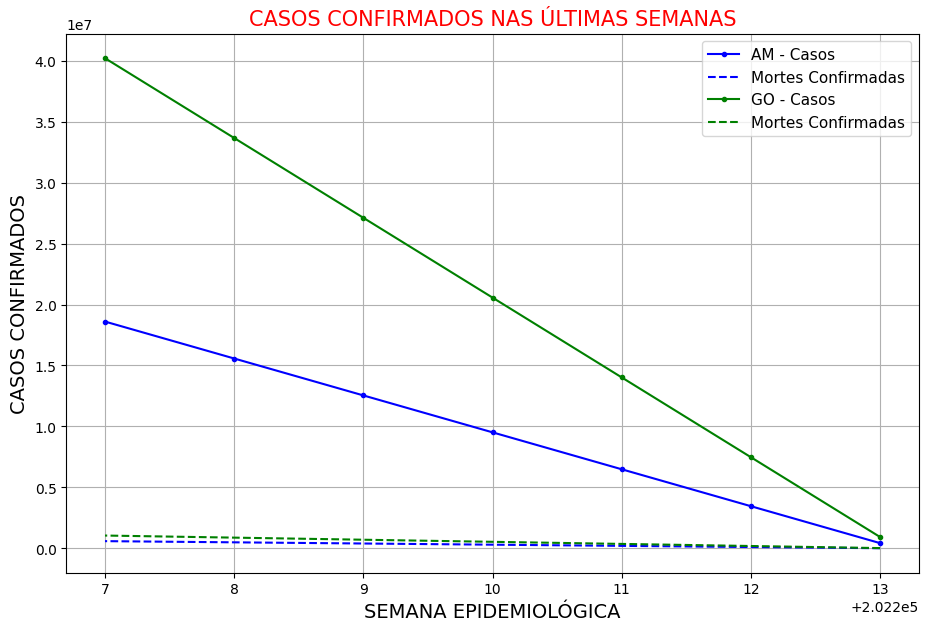

In [339]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(datas_estado1, estado1_casos_semana, 'b.-', label=estado1+" - Casos")
plt.plot(datas_estado1, estado1_mortes_semana, 'b--', label='Mortes Confirmadas')
plt.plot(datas_estado2, estado2_casos_semana, 'g.-', label=estado2+" - Casos")
plt.plot(datas_estado2, estado2_mortes_semana, 'g--', label='Mortes Confirmadas')
plt.legend(fontsize = 11)
plt.grid()
plt.title('CASOS CONFIRMADOS NAS ÚLTIMAS SEMANAS', fontsize = 15, color= 'red')
plt.xlabel('SEMANA EPIDEMIOLÓGICA', fontsize = 14)
plt.ylabel('CASOS CONFIRMADOS', fontsize = 14)
plt.show()

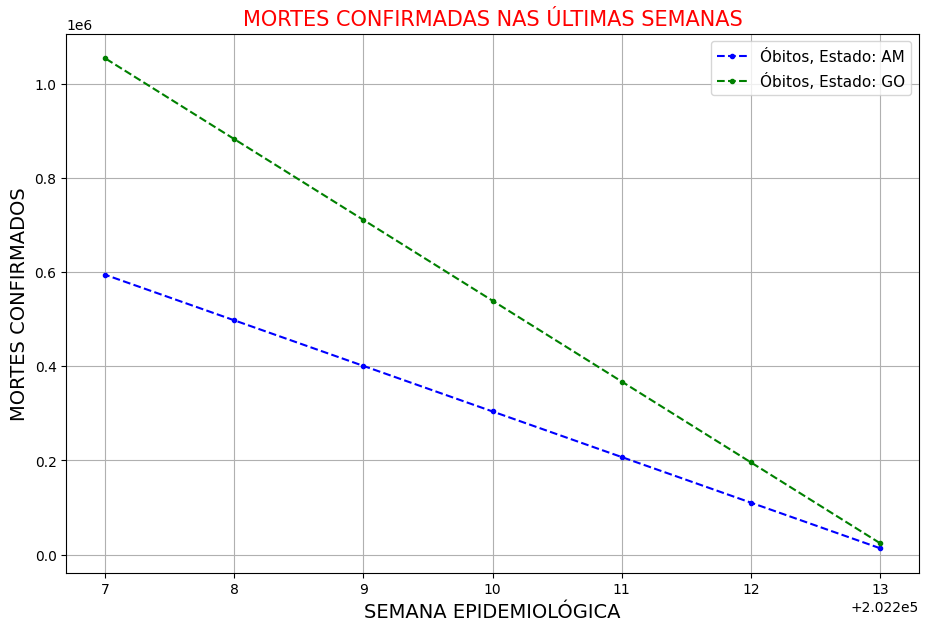

In [337]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(datas_estado1, estado1_mortes_semana, 'b.--', label='Óbitos, Estado: {}'.format(estado1))
plt.plot(datas_estado2, estado2_mortes_semana, 'g.--', label='Óbitos, Estado: {}'.format(estado2))
plt.legend(fontsize = 11)
plt.grid()
plt.title('MORTES CONFIRMADAS NAS ÚLTIMAS SEMANAS', fontsize = 15, color= 'red')
plt.xlabel('SEMANA EPIDEMIOLÓGICA', fontsize = 14)
plt.ylabel('MORTES CONFIRMADOS', fontsize = 14)
plt.show()

In [333]:
print('==================================== {} ===================================='.format(estado1))
print('Casos: {}'.format(estado1_casos_semana))
print('Óbitos: {}'.format(estado1_mortes_semana))
print('Semana: {}'.format(datas_estado1))
print('==================================== {} ===================================='.format(estado2))
print('Casos: {}'.format(estado2_casos_semana))
print('Óbitos: {}'.format(estado2_mortes_semana))
print('Semana: {}'.format(datas_estado2))

==================================== AM ====================================
Casos: [432588, 3460704, 6488820, 9516936, 12545052, 15573168, 18601284]
Óbitos: [13820, 110560, 207300, 304040, 400780, 497520, 594260]
Semana: [202213, 202212, 202211, 202210, 202209, 202208, 202207]
==================================== GO ====================================
Casos: [934879, 7479032, 14023185, 20567338, 27111491, 33655644, 40199797]
Óbitos: [24504, 196032, 367560, 539088, 710616, 882144, 1053672]
Semana: [202213, 202212, 202211, 202210, 202209, 202208, 202207]


# Comparando duas Cidades

In [300]:
arquivo[arquivo.city=='São Paulo']

,city,date,epidemiological_week,last_available_confirmed,last_available_deaths,place_type,state,new_confirmed
3308955,São Paulo,2020-02-25,202009,1,0,city,SP,1
3308957,São Paulo,2020-02-26,202009,1,0,city,SP,0
3308959,São Paulo,2020-02-27,202009,1,0,city,SP,0
3308961,São Paulo,2020-02-28,202009,2,0,city,SP,1
3308963,São Paulo,2020-02-29,202009,2,0,city,SP,0
...,...,...,...,...,...,...,...,...
3755216,São Paulo,2022-03-23,202212,976214,39352,city,SP,0
3755863,São Paulo,2022-03-24,202212,976214,39352,city,SP,0
3756510,São Paulo,2022-03-25,202212,976214,39352,city,SP,0
3757157,São Paulo,2022-03-26,202212,976214,39352,city,SP,0


In [303]:
# cidade1 = input('Digite o nome da primeira Cidade: ')
# dados_cidade1 = arquivo[arquivo.city == cidade1]
cidade1 = 'Belém'
dados_cidade1 = arquivo[arquivo.city == cidade1]
while dados_cidade1.empty:
    print('A cidade {} não existe!'.format(cidade1))
    cidade1 = input('Digite a sigla da primeira Cidade: ')
    dados_cidade1 = arquivo[arquivo.city == cidade1]

In [304]:
# cidade2 = input('Digite o nome da segunda Cidade: ')
# dados_cidade2 = arquivo[arquivo.city == cidade2]
cidade2 = 'Manaus'
dados_cidade2 = arquivo[arquivo.city == cidade2]
while dados_cidade2.empty:
    print('A cidade {} não existe!'.format(cidade2))
    cidade2 = input('Digite a sigla da segunda Cidade: ')
    dados_cidade2 = arquivo[arquivo.city == cidade2]

In [312]:
dados_cidade1

,city,date,epidemiological_week,last_available_confirmed,last_available_deaths,place_type,state,new_confirmed
18112,Belém,2020-05-22,202021,1,0,city,AL,1
18206,Belém,2020-05-23,202021,1,0,city,AL,0
18306,Belém,2020-05-24,202022,2,1,city,AL,1
18406,Belém,2020-05-25,202022,2,1,city,AL,0
18506,Belém,2020-05-26,202022,2,1,city,AL,0
...,...,...,...,...,...,...,...,...
1924159,Belém,2022-03-23,202212,2407,45,city,PB,0
1924384,Belém,2022-03-24,202212,2407,45,city,PB,0
1924609,Belém,2022-03-25,202212,2407,45,city,PB,0
1924834,Belém,2022-03-26,202212,2407,45,city,PB,0


In [315]:
dados_cidade1.date[:7]

18112    2020-05-22
18206    2020-05-23
18306    2020-05-24
18406    2020-05-25
18506    2020-05-26
18606    2020-05-27
18708    2020-05-28
Name: date, dtype: object

In [317]:
dados_cidade1.last_available_confirmed[0:7]

18112    1
18206    1
18306    2
18406    2
18506    2
18606    2
18708    2
Name: last_available_confirmed, dtype: int64

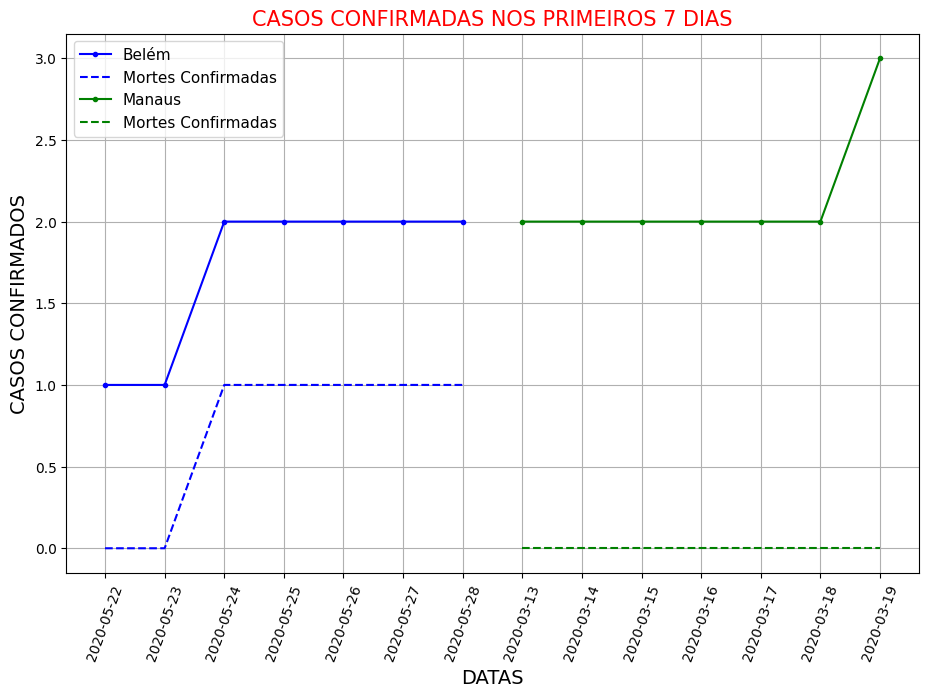

In [313]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(dados_cidade1.date[0:7], dados_cidade1.last_available_confirmed[0:7], 'b.-', label=cidade1)
plt.plot(dados_cidade1.date[0:7], dados_cidade1.last_available_deaths[0:7], 'b--', label='Mortes Confirmadas')
plt.plot(dados_cidade2.date[0:7], dados_cidade2.last_available_confirmed[0:7], 'g.-', label=cidade2)
plt.plot(dados_cidade2.date[0:7], dados_cidade2.last_available_deaths[0:7], 'g--', label='Mortes Confirmadas')
plt.legend(fontsize = 11)
plt.grid()
plt.title('CASOS CONFIRMADAS NOS PRIMEIROS 7 DIAS', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.xticks(rotation=70)
plt.ylabel('CASOS CONFIRMADOS', fontsize = 14)
plt.show()

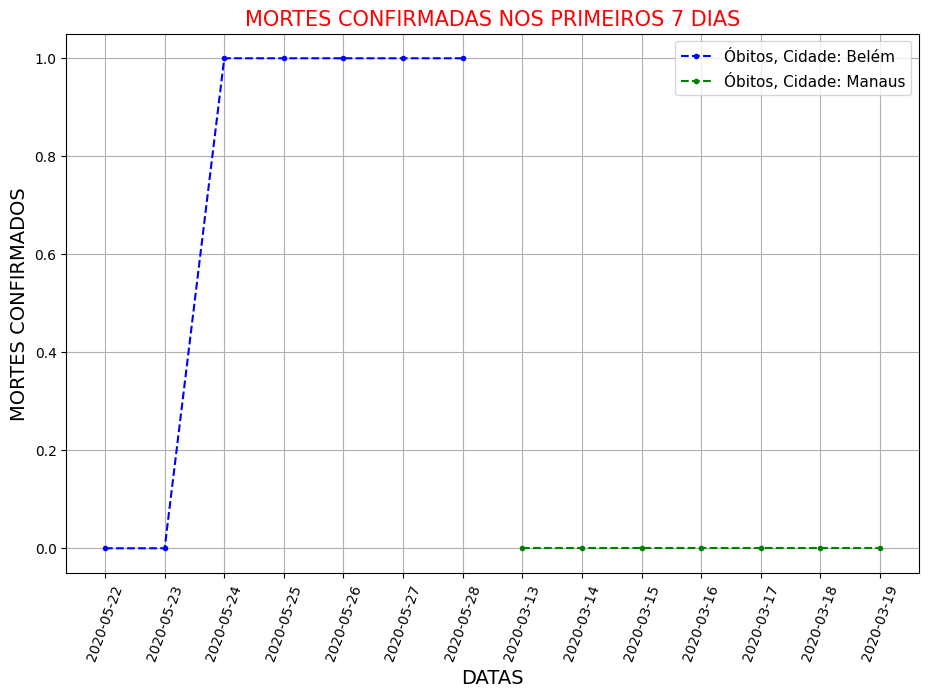

In [314]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(dados_cidade1.date[:7], dados_cidade1.last_available_deaths[:7], 'b.--', label='Óbitos, Cidade: {}'.format(cidade1))
plt.plot(dados_cidade2.date[:7], dados_cidade2.last_available_deaths[:7], 'g.--', label='Óbitos, Cidade: {}'.format(cidade2))
plt.legend(fontsize = 11)
plt.grid()
plt.title('MORTES CONFIRMADAS NOS PRIMEIROS 7 DIAS', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.xticks(rotation=70)
plt.ylabel('MORTES CONFIRMADOS', fontsize = 14)
plt.show()